# APA a.a. 22/23 - Consenso Bizantino
## Enrico Pezzano - Eugenio Pallestrini
(Compito 7.1 delle note)

***Ipotesi***
ad ogni round, il risultato del lancio di una moneta globale con probabilita'
$$P(testa) = P(croce) = \frac{1}{2}$$
e' comunicato a tutti i processi.

- $n = 3t + 1$: processi totali
- $t$: processi inaffidabili
- $n - t = 2t + 1$: processi affidabili
- $b(i) \in \{0, 1\}$: valore del *bit* dell'$i$-esimo processo per $i = 1, ..., n$
- $v$: valore su cui gli $n - t$ processi affidabili raggiungono il consenso 


***Consenso***  
i bit dei processi affidabili assumono tutti lo stesso valore, ovvero, dopo un certo numero
di round, se $i$ e un processo affidabile $b(i) = v$.  
***Validita'***  
Se il valore inziale di tutti i processi affidabili e lo stesso, e uguale a $v_0$, allora $v = v_0$
(questa condizione impedisce la soluzione banale fissata a priori quale, per esempio, $v = 0$).

Quindi, il consenso viene raggiunto se tutti gli $n - t$ processi affidabili hanno lo stesso valore

### L'algoritmo di tipo MonteCarlo in pseudo-codice e':
```py
while not consenso:
    per ogni processo i:
        1. invia b(i) ad ogni altro processo
        2. ricevi dagli altri processi
        3. calcola maj(i)
        4. calcola tally(i)
        5. if tally >= 2*t + 1 = n - t:
            b(i) = maj(i)
           elif coin == testa:
            b(i) = 1
           else:
            b(i) = 0
```
### L'algoritmo di tipo MonteCarlo in python e':

In [ ]:
%pip install numpy
%pip install matplotlib

In [48]:
import random

results = []
iterations = 10000
HEAD = 1
TAILS = 0
HONESTPROCESS = 3
GlobalCoin = random.randint(0, 1)
Generals = [[],[],[],[]] # list of lists
maj = [] # list
tally = [] # list
GENLENGTH = len(Generals)-1
neededRounds = 0
expectedRounds = 0

T = 2 * 1 + 1 #threshold (2 * f(aulty) + 1)

R = pow(2, 10)

def most_frequent(mylist):
    counter = {}
    for element in mylist:
        if element in counter.keys():
            counter[element]+=1
        else:
            counter[element] = 1
    if counter.get(0) == counter.get(1):
        return random.randint(0,1)
    else:
        return max(counter, key = counter.get)

def main():
   for i in range(iterations):

      for general in Generals:
         general.clear()
      maj.clear()
      tally.clear()

      neededRounds = 0

      while True:
         GlobalCoin = random.randint(0, 1)
         if neededRounds == 0:
               #taking every general's deciosion randomically and transmitting the information to every other general
               for general in range(GENLENGTH):
                  decision = random.randint(0, 1)
                  for otherGeneral in range(GENLENGTH):
                     Generals[otherGeneral].append(decision)

               #setting up the last general's decision for every general (it should be the opposite of the i-th general)
               for general in range(GENLENGTH):
                  Generals[general].append(1-Generals[general][general]) 
         
         #this is the termination's condition, if there is a majority among the generals' decisions
         if Generals[0][0] == Generals[1][1] == Generals[2][2]:
               results.append(neededRounds)
               break

         #setting up maj to rappresent the majority inside the generals' decisions
         #setting up tally to take be the number of times that the maj value shows up
         most_freqElement = 0
         for general in range(GENLENGTH):
               maj.append(most_frequent(Generals[general]))
               tally.append(Generals[general].count(maj[most_freqElement]))
               most_freqElement+=1

         #taking every general's decision based on the majority or on the value of the global coin
         resultingDecisions = []
         for decisions in range(len(tally)):
               if tally[decisions] >= HONESTPROCESS:
                  resultingDecisions.append(maj[decisions])
               elif GlobalCoin == HEAD:
                  resultingDecisions.append(1)
               else:
                  resultingDecisions.append(0)
         
         #resetting the generals with the new values
         for element in Generals:
               element.clear()

         general_i_decision = 0
         for general in range(GENLENGTH):
               decision = resultingDecisions[general_i_decision]
               for otherGeneral in range(GENLENGTH):
                  Generals[otherGeneral].append(decision)
               general_i_decision+=1

         #setting up the last General, the impostor for every general
         for general in range(GENLENGTH):
               Generals[general].append(1-Generals[general][general]) 


         # Check if tally(i) ≥ T for a specific honest process j
         for j in range(1,3): # Index of the reliable process
            if tally[j] >= T and GlobalCoin == maj[j]:
               expectedRounds = neededRounds + 1

         maj.clear()
         tally.clear()
         neededRounds+=1

   print()
   if(expectedRounds == neededRounds):
      print("L'accordo è stato raggiunto nel round successivo al controllo di (tally[j] >= T and GlobalCoin == maj[j]) :D")

   print("\nN° di round per raggiungere l'accordo:", neededRounds)

   print("\nR: ", R)
   print()
main()


L'accordo è stato raggiunto nel round successivo al controllo di tally[j] >= T and GlobalCoin == maj[j] :D

N° di round per raggiungere l'accordo: 2

R:  1024



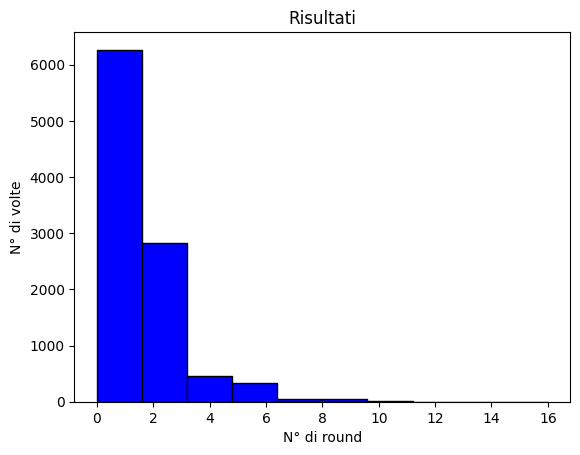

L'accordo e' stato raggiunto  2535  volte in  0  round
L'accordo e' stato raggiunto  3733  volte in  1  round
L'accordo e' stato raggiunto  1918  volte in  2  round
L'accordo e' stato raggiunto  915  volte in  3  round
L'accordo e' stato raggiunto  450  volte in  4  round
L'accordo e' stato raggiunto  229  volte in  5  round
L'accordo e' stato raggiunto  105  volte in  6  round
L'accordo e' stato raggiunto  54  volte in  7  round
L'accordo e' stato raggiunto  29  volte in  8  round
L'accordo e' stato raggiunto  23  volte in  9  round
L'accordo e' stato raggiunto  3  volte in  10  round
L'accordo e' stato raggiunto  1  volte in  11  round
L'accordo e' stato raggiunto  2  volte in  12  round
L'accordo e' stato raggiunto  2  volte in  13  round
L'accordo e' stato raggiunto  1  volte in  16  round


In [49]:
import matplotlib.pyplot as plt
plt.hist(results, bins = 10, color = "blue", edgecolor = "black")
plt.title("Risultati")
plt.xlabel("N° di round")
plt.ylabel("N° di volte")
plt.show()

for i in list(set(results)):
   print("L'accordo e' stato raggiunto ", results.count(i), " volte in ", i, " round")
